In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from keras.datasets import cifar10

Using TensorFlow backend.


In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [0]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


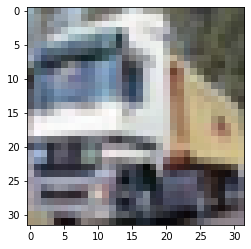

In [0]:
plt.imshow(x_train[1])
plt.show()

In [0]:
from tqdm import tqdm
from keras.layers import Input, Dense, Dropout, Flatten, LeakyReLU
from keras.models import Model, Sequential
from keras.optimizers import Adam
from keras import backend as K

In [0]:
X_train= (x_train.astype(np.float32)-127.5)/127.5 

In [0]:
K.set_image_dim_ordering('th')
#th:(depth,input,rows,colunms)
#tf:(rows,columns,input,depth)

np.random.seed(1000)

randomDim=100 #10*10 image

In [0]:
X_train=X_train.reshape(50000,3072)

In [0]:
adam=Adam(lr=0.0002 ,beta_1=0.5)

In [0]:
generator=Sequential()
generator.add(Dense(256, input_dim=randomDim)) #Passing random noise as input
generator.add(LeakyReLU(0.2)) 

generator.add(Dense(512))
generator.add(LeakyReLU(0.2))

generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))

generator.add(Dense(3072, activation='tanh'))
generator.compile(loss='binary_crossentropy',optimizer=adam)
generator.summary()

W0714 13:41:47.521632  7364 deprecation_wrapper.py:119] From C:\Users\RAHUL\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\backend\tensorflow_backend.py:492: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0714 13:41:47.656734  7364 deprecation_wrapper.py:119] From C:\Users\RAHUL\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\backend\tensorflow_backend.py:3630: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0714 13:41:47.897899  7364 deprecation_wrapper.py:119] From C:\Users\RAHUL\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\optimizers.py:711: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0714 13:41:47.915911  7364 deprecation_wrapper.py:119] From C:\Users\RAHUL\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\backend\tensorflow_backend.py:2944: The name tf.log is deprecated. Please use tf.math.log inste

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 3072)              3148800   
Total para

In [0]:
discriminator=Sequential()
discriminator.add(Dense(1024, input_dim=3072))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))

discriminator.add(Dense(512))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
                  
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
            
discriminator.add(Dense(1,activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy',optimizer=adam)
discriminator.summary()

W0714 13:42:14.866019  7364 deprecation.py:506] From C:\Users\RAHUL\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\backend\tensorflow_backend.py:3013: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               524800    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
__________

In [0]:
#Combining generator and descriminator
discriminator.trainable=False
ganInput=Input(shape=(randomDim,)) #Functional model- image is given as input
x=generator(ganInput)
ganOutput=discriminator(x)

gan=Model(input=ganInput, output=ganOutput)
gan.compile(loss='binary_crossentropy',optimizer=adam)
gan.summary()

C:\Users\RAHUL\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("se...)`
  import sys


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential_2 (Sequential)    (None, 3072)              3831552   
_________________________________________________________________
sequential_3 (Sequential)    (None, 1)                 3803137   
Total params: 7,634,689
Trainable params: 3,831,552
Non-trainable params: 3,803,137
_________________________________________________________________


In [0]:
def generateAndPlot():
    num_examples=100
    noise=np.random.normal(0,1,size=[num_examples,randomDim])
    generatedImages=generator.predict(noise)
    generatedImages=generatedImages.reshape(num_examples,32,32,3)
    plt.figure(figsize=(10,10))
    for i in range(num_examples):
        plt.subplot(10,10,i+1)
        plt.imshow(generatedImages[i],interpolation='nearest',cmap='gray_r')
        plt.axis('off')
    plt.show()

In [0]:
def train(epochs=1, batchSize=128):
    m=X_train.shape[0]
    batchCount=m//batchSize #  // divide by integer--typecasting
    generateAndPlot()
    for e in range(epochs):
        print(f"Epoch:{e}")
        for _ in tqdm(range(batchCount)):
            noise=np.random.normal(0,1,size=[batchSize, randomDim])
            generatedImages=generator.predict(noise)  #Fake images are generated
            
            imageBatch=X_train[np.random.randint(0,m,size=batchSize)]  #choose any 128 images from 60000 images(real images)
            X=np.concatenate([imageBatch, generatedImages])  # Concatenate fake and real images-total 256 images
            
            yDis = np.zeros(2*batchSize) #256
            yDis[:batchSize]=0.9  #Real Images are assigned as 1 here 0.9-- One sided label smoothing
            
            discriminator.trainable=True
            dLoss=discriminator.train_on_batch(X,yDis) #Calculate loss every time
            discriminator.trainable=False
            
            noise=np.random.normal(0,1,size=[batchSize,randomDim])
            yGan=np.ones(batchSize)
            gLoss=gan.train_on_batch(noise,yGan)
            
        if e%10==0:
            generateAndPlot()

W0714 13:43:47.860653  7364 deprecation_wrapper.py:119] From C:\Users\RAHUL\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\backend\tensorflow_backend.py:2373: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0714 13:43:51.032895  7364 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0714 13:43:51.065918  7364 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0714 13:43:51.113951  7364 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0714 13:43:51.162986  7364 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0714 13:43:51.216023  7364 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for

W0714 13:43:54.521366  7364 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0714 13:43:54.591415  7364 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0714 13:43:54.688485  7364 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0714 13:43:54.736522  7364 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0714 13:43:54.797562  7364 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0714 13:43:54.841594  7364 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0714 13:43:54.888626  7364 image.py:693] Clipping input data to the valid range for ims

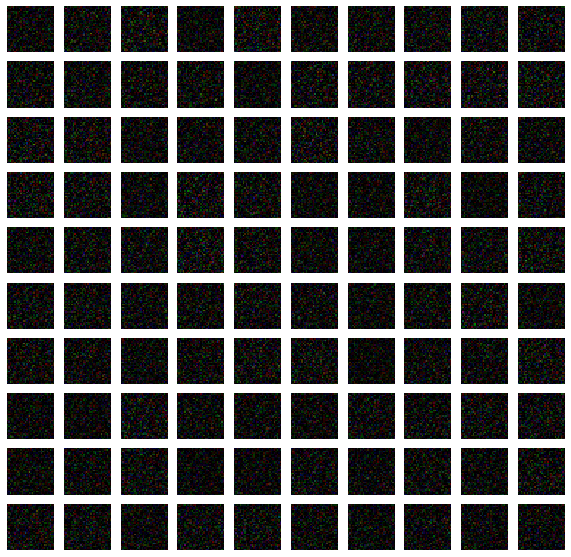

Epoch:0


  0%|                                                  | 0/390 [00:00<?, ?it/s]W0714 13:44:03.556771  7364 deprecation.py:506] From C:\Users\RAHUL\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\backend\tensorflow_backend.py:675: calling Constant.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
 52%|████████████████████▉                   | 204/390 [02:34<01:55,  1.61it/s]

KeyboardInterrupt: 

In [0]:
train(50)